$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [1]:
import numpy as np 

#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  
  return np.array([[3000,4],[4,2]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  b,s=np.linalg.eig(A)
  
  return max(b)/min(b)
  

In [2]:
print("Condition number : ", find_condition_number(np.array([[3000,4],[4,2]])))

Condition number :  1504.0160463434236


The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$ \
Yes, the matrix $Q$ can be identified. \
\
$Q = ((D^{k})^{1/2})^{T}A^{k}(D^{k})^{1/2}$
\
Here, $A^{k}$ is the Hessian

$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$ \
\
\begin{equation} \\ \mathbf{D}^k =
\begin{bmatrix}
\frac{1}{3000} & 0 \\ 0 & \frac{1}{2}
\end{bmatrix}
\end{equation}

Write code to find the matrix $\mathbf{D}^k$. 

diagonal matrix with eigenvalues of hessian will give us D

In [3]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  # hessinv=np.linalg.inv(evalh(x))
  # print(hessinv)
  eig=np.linalg.eig(evalh(x))
  # print(eig[0])
  D = np.array([[1/eig[0][0],0],[0,1/eig[0][1]]])
  # print(D)
  return D

In [4]:
compute_D_k(np.array([1,0]))

array([[3.3333274e-04, 0.0000000e+00],
       [0.0000000e+00, 5.0133779e-01]])

In [5]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (1500*(x[0])**2) + (4*x[0]*x[1]) + (x[1])**2


In [6]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([3000*x[0] + 4*x[1], 4*x[0] + 2*x[1]])

In [7]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code 
  step_length = (np.dot(gradf.T,gradf))/(np.matmul(np.matmul(gradf,2*A),gradf))
  return step_length

In [8]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  #Complete the code 
  alpha = alpha_start
  p_k = -gradf
  #implement the backtracking line search
  while evalf(x + alpha*p_k) > (evalf(x) + gamma*alpha*(np.dot(gradf.transpose(),p_k))):
    alpha = rho* alpha 
  return alpha
  
  

In [9]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  alpha = alpha_start
  while evalf(x + alpha*direction) > ( evalf(x) +  (gamma*alpha*np.dot(gradf,direction)) ):
     alpha = rho*alpha
  return alpha

In [10]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3
BACKTRACKING_LINE_SEARCH_SCALING = 4

In [11]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,evalf(x),k   


In [12]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)
  d_k = compute_D_k(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH_SCALING):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    direction = -np.matmul(d_k,g_x)
    if line_search_type == BACKTRACKING_LINE_SEARCH_SCALING:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,direction,alpha_start,rho,gamma)
      

    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.matmul(np.multiply(step_length,g_x),d_k)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x ,evalf(x),k

  #Complete the code   

$ \huge{7.}$ \
The minimizer is origin $(0,0)$ \
\
The function value at this point is $0$

$ \huge{8.}$ \
The code is implemented below:

In [13]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [15]:
#check gradient descent with exact line search 
min_x,f_x,iteration_num = find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer =",min_x)
print("Function values =",f_x)
print("Number of iterations =",iteration_num)

Minimizer = [-7.44595231e-16  4.61544291e-13]
Function values = 2.1248011077913554e-25
Number of iterations = 14075


In [16]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
min_x,f_x,iteration_num = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print("Minimizer =",min_x)
print("Function values =",f_x)
print("Number of iterations is",iteration_num)

Minimizer = [-4.78532202e-16  4.53575301e-13]
Function values = 2.0520584176089396e-25
Number of iterations is 21985


In [17]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
min_x,f_x,iteration_num = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING,alpha_start,rho,gamma)
print("Minimizer =",min_x)
print("Function values =",f_x)
print("Number of iterations is",iteration_num)

Minimizer = [-1.36742258e-17  5.59804399e-15]
Function values = 3.1312377486575754e-29
Number of iterations is 20


**Exact Line Search**

Minimizer :  (-7.44595231e-16,    4.61544291e-13)


Function value at minimizer :  2.1248011077913554e-25


Number of iterations :  14075

**Backtracking Line Search without Scaling**

Minimizer :  (-4.78532202e-16,  4.53575301e-13)


Function value at minimizer :  2.0520584176089396e-25


Number of iterations :  21985

**Backtracking Line Search with Scaling** 

Minimizer :  (-1.36742258e-17,  5.59804399e-15)

Function value at minimizer :  9.217397790469283e-31

Number of iterations :  20

**Observations:** The Backtracking Line Search algorithm takes a small number of iterations as compared to those taken by the Exact Line Search algorithm as well as the Backtracking Line Search algorithm.

$ \huge{9.}$
The code is implemented below:

**Backtracking Line Search:**

In [22]:
alphas = [1., 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
number_of_iteration1 = []
for i in alphas:
  min_x,f_x,iteration_num = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,i,rho,gamma)
  print("For alpha :",i )
  print("Minimizer : ",min_x)
  print("Function value at minimizeer : ",f_x)
  print("Number of iterations is ",iteration_num)
  print('\n\n')
  number_of_iteration1.append(iteration_num)

For alpha : 1.0
Minimizer :  [-4.78532202e-16  4.53575301e-13]
Function value at minimizeer :  2.0520584176089396e-25
Number of iterations is  21985



For alpha : 0.9
Minimizer :  [-5.48799355e-16  4.71515450e-13]
Function value at minimizeer :  2.2174352131747877e-25
Number of iterations is  15941



For alpha : 0.75
Minimizer :  [-7.18643891e-16  4.89175378e-13]
Function value at minimizeer :  2.386610528547938e-25
Number of iterations is  6750



For alpha : 0.6
Minimizer :  [-6.07554226e-16  4.94036636e-13]
Function value at minimizeer :  2.43425264283868e-25
Number of iterations is  6887



For alpha : 0.5
Minimizer :  [-4.78532202e-16  4.53575301e-13]
Function value at minimizeer :  2.0520584176089396e-25
Number of iterations is  21985



For alpha : 0.4
Minimizer :  [-7.24091328e-16  4.84454819e-13]
Function value at minimizeer :  2.3407977615582728e-25
Number of iterations is  11362



For alpha : 0.25
Minimizer :  [-4.78532202e-16  4.53575301e-13]
Function value at minimizeer

In [23]:
alpha = [1., 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
number_of_iteration2 = []
for alpha_start in alpha:
  min_x,f_x,iteration_num = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING,alpha_start,rho,gamma)
  print("For alpha :",alpha_start )
  print("Minimizer : ",min_x)
  print("Function value : ",f_x)
  print("Number of iterations is ",iteration_num)
  print('\n\n')
  number_of_iteration2.append(iteration_num)

For alpha : 1.0
Minimizer :  [-1.36742258e-17  5.59804399e-15]
Function value :  3.1312377486575754e-29
Number of iterations is  20



For alpha : 0.9
Minimizer :  [-1.31416084e-16  4.96629638e-15]
Function value :  4.7958775398654874e-29
Number of iterations is  21



For alpha : 0.75
Minimizer :  [-2.50270917e-16  9.45874746e-15]
Function value :  1.7395220370774966e-28
Number of iterations is  32



For alpha : 0.6
Minimizer :  [-3.10257539e-16  1.17410449e-14]
Function value :  2.6767075533875098e-28
Number of iterations is  47



For alpha : 0.5
Minimizer :  [-2.32838753e-16  8.82892109e-15]
Function value :  1.5104781515698985e-28
Number of iterations is  62



For alpha : 0.4
Minimizer :  [-3.04816128e-16  1.15976157e-14]
Function value :  2.597334360336175e-28
Number of iterations is  83



For alpha : 0.25
Minimizer :  [-3.31238110e-16  1.26889064e-14]
Function value :  3.0877417760576744e-28
Number of iterations is  146



For alpha : 0.1
Minimizer :  [-3.49507546e-16  1.3502

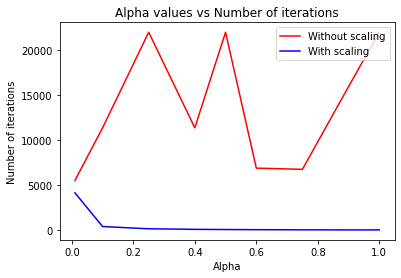

In [24]:
import matplotlib.pyplot as plt
plt.plot(alphas,number_of_iteration1, label = 'Without scaling', color ='red')
plt.plot(alphas,number_of_iteration2,label = 'With scaling', color ='blue')
plt.xlabel('Alpha')
plt.ylabel('Number of iterations')
plt.title("Alpha values vs Number of iterations")
plt.legend(loc = 'upper right')
plt.show()

**Observations:** From the graph, we can clearly see that in the case where scaling is used, the number of iterations required to reach the minimizer decreases as alpha increases until it reaches 0.1, beyond which it becomes more or less constant. \
In case the scaling is not used, we observe that the minimium value of the function is reached in fewer number of iterations.

$ \huge{10.}$ \
The code is implemented below:

**Backtracking Line Search without Scaling**

In [25]:
rho = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
number_of_iteration3 = []
alpha_start = 1.0
for i in rho:
  min_x,f_x,iteration_num = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,i,gamma)
  print("For rho =",i )
  print("Minimizer : ",min_x)
  print("Function value at minimizer =",f_x)
  print("Number of iterations is ",iteration_num)
  print('\n\n')
  number_of_iteration3.append(iteration_num)

For rho = 0.9
Minimizer :  [-6.44686128e-16  4.90962904e-13]
Function value at minimizer = 2.404019351870065e-25
Number of iterations is  127



For rho = 0.8
Minimizer :  [-6.99968590e-16  4.40149178e-13]
Function value at minimizer = 1.932338703071826e-25
Number of iterations is  1471



For rho = 0.75
Minimizer :  [-7.15454842e-16  4.83616543e-13]
Function value at minimizer = 2.332687511412074e-25
Number of iterations is  3135



For rho = 0.6
Minimizer :  [-7.07691748e-16  4.70469643e-13]
Function value at minimizer = 2.2076113616544364e-25
Number of iterations is  15834



For rho = 0.5
Minimizer :  [-4.78532202e-16  4.53575301e-13]
Function value at minimizer = 2.0520584176089396e-25
Number of iterations is  21985



For rho = 0.4
Minimizer :  [-5.16461460e-16  4.67846629e-13]
Function value at minimizer = 2.1831406770108246e-25
Number of iterations is  20049



For rho = 0.25
Minimizer :  [-5.67128954e-16  4.70177132e-13]
Function value at minimizer = 2.204823842206756e-25
Numb

**Backtracking Line Search with Scaling**

In [27]:
rho = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
number_of_iteration4 = []
print("By using backtracking line search with scaling")
for i in rho:
  min_x,f_x,iteration_num = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH_SCALING,alpha_start,i,gamma)
  print("For rho =",i )
  print("Minimizer : ",min_x)
  print("Function value at minimizer =",f_x)
  print("Number of iterations is",iteration_num)
  print('\n\n')
  number_of_iteration4.append(iteration_num)

By using backtracking line search with scaling
For rho = 0.9
Minimizer :  [-1.72054923e-16  9.24207245e-16]
Function value at minimizer = 4.4622446453036665e-29
Number of iterations is 14



For rho = 0.8
Minimizer :  [-1.46100971e-16  5.54648152e-14]
Function value at minimizer = 3.0759501169042234e-27
Number of iterations is 14



For rho = 0.75
Minimizer :  [-8.51303692e-17  2.19050144e-14]
Function value at minimizer = 4.832412957752553e-28
Number of iterations is 15



For rho = 0.6
Minimizer :  [-2.61938545e-17  1.45993434e-14]
Function value at minimizer = 2.1264035298355912e-28
Number of iterations is 17



For rho = 0.5
Minimizer :  [-1.36742258e-17  5.59804399e-15]
Function value at minimizer = 3.1312377486575754e-29
Number of iterations is 20



For rho = 0.4
Minimizer :  [-8.05629110e-18  5.21636566e-15]
Function value at minimizer = 2.713972816754646e-29
Number of iterations is 23



For rho = 0.25
Minimizer :  [-3.95539650e-18  2.57320488e-15]
Function value at minimizer 

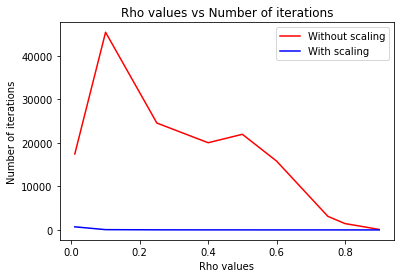

In [29]:
plt.plot(rho,number_of_iteration3, label = 'Without scaling', color ='red')
plt.plot(rho,number_of_iteration4,label = 'With scaling', color ='blue')
plt.xlabel('Rho values')
plt.ylabel('Number of iterations')
plt.title("Rho values vs Number of iterations")
plt.legend(loc = 'upper right')
plt.show()

**Observations:** We observe that with scaling, the number of iterations required to reach the minimizer value stays more or less constant as the rho values increase. \
However, in the 'without scaling' case, we can see a lot of  fluctuations in the number as iterations required to reach the minimizer value as the rho values increase. There is a sharp rise in the number of iterations as rho goes from 0 to 0.1, beyond which the number of iterations appear to follow a general downwards trend. \
We also observer that in case of scaling, the minimum value of the function is quite close to the real values as compared to the values provided by the 'without scaling' algorithm, along with fewer number of iterations required in the former case as compared to the latter.